In [3]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv("D:/DOWNLOADS/creditcard.csv")

# Pre-processing: Scale features, handle missing values, and outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset.drop("Class", axis=1))  # Exclude the target variable
scaled_df = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])  # Create a new DataFrame with scaled features
scaled_df["Class"] = dataset["Class"]  # Add the target variable back

# Handle missing values and outliers if necessary
# You can use techniques like imputation or outlier detection and removal here


In [4]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop("Class", axis=1)
y = scaled_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9991
Precision: 0.8636
Recall: 0.5816
F1-Score: 0.6951


In [11]:
# Example new transaction with actual feature values
new_transaction_values = [
    -1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554,
    0.098697901, 0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354,
    1.468176972, -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098, -0.018306778,
    0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377, -0.021053053, 
    149.62, 0  # Adding the "Time" and "Class" values
]

# Adding the "Time" column name to the feature_columns list
feature_columns_with_time = ['Time'] + feature_columns

# Creating a new transaction dataframe
new_transaction_df = pd.DataFrame([new_transaction_values], columns=feature_columns_with_time)

# Predicting the class using the trained model
predicted_class = model.predict(new_transaction_df)
print("Predicted Class:", predicted_class)


Predicted Class: [0]


In [13]:
print(X_train)

            Time        V1        V2        V3        V4        V5        V6  \
223361  1.022112  0.998136 -0.230595 -0.207758  0.233183 -0.369046 -0.064700   
165061  0.470837 -0.204716 -0.379665  1.025778 -1.425115 -0.078079  0.126334   
238186  1.152945  0.037019  0.496919 -0.370223 -0.501387  0.782760 -0.269788   
150562 -0.024087 -0.273165  0.614415  1.154609  1.955969  0.362319  0.752303   
138452 -0.256040 -2.055932  1.149012 -0.283453 -0.020886 -0.620000 -0.360593   
...          ...       ...       ...       ...       ...       ...       ...   
119879 -0.404225  0.599118  0.061038  0.323503  0.326017 -0.214728 -0.160001   
259178  1.351627 -0.396173  0.087218 -0.753436 -0.876575  1.405808  2.936401   
131932 -0.316266 -0.074850  0.601310  1.005500  0.343093  0.253077 -0.611887   
146867 -0.144939 -1.505412  1.426053 -1.662785 -2.683097  1.352153  2.047406   
121958 -0.388158  0.629591 -0.475291  0.255092 -0.493379 -0.749156 -0.478153   

              V7        V8        V9  .

In [14]:
print(y_train)

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64


In [15]:
print(X_test)

            Time        V1        V2         V3        V4        V5        V6  \
43428  -1.122574 -8.437520  5.198899 -12.299967  6.713625 -9.993751 -2.126001   
49906  -1.064538  0.173489 -1.661561  -0.088422 -0.978715 -1.051563  0.762524   
29474  -1.249364  0.714553 -0.357718   0.111208 -0.727435 -0.391095  0.030357   
276481  1.522680 -0.220592  0.997935  -1.100978 -0.246848  0.569308 -0.473363   
278846  1.551109  1.028319 -0.083203  -0.669967  0.231144 -0.131991 -0.718001   
...          ...       ...       ...        ...       ...       ...       ...   
75723  -0.812643 -1.018204  0.910235  -0.241094  0.551057 -0.694048  0.029009   
252263  1.282683 -0.119757  0.444312   0.320692 -0.507242  0.566731 -0.592101   
221246  1.003982  0.020647 -0.066455  -0.835237  0.709660  1.610867 -0.503180   
81910  -0.750859 -0.252744  0.600422   1.102444 -0.241883  0.340528 -0.261586   
59490  -0.967609 -0.812014  0.600988  -0.338230  0.791566 -1.388708  2.358515   

               V7        V8

In [16]:
print(y_test)

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64


ValueError: Item wrong length 1 instead of 56962.

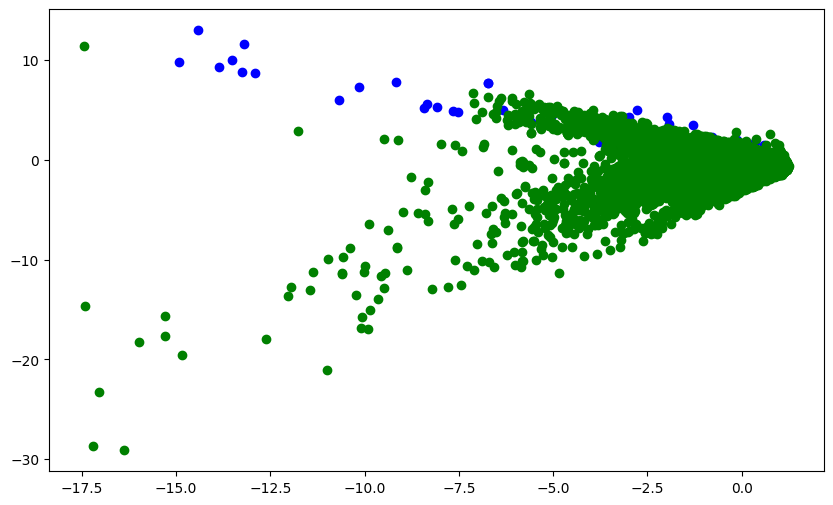

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot actual fraud transactions in blue
plt.scatter(X_test[y_test == 1]['V1'], X_test[y_test == 1]['V2'], color='blue', label='Actual Fraud')

# Plot actual non-fraud transactions in green
plt.scatter(X_test[y_test == 0]['V1'], X_test[y_test == 0]['V2'], color='green', label='Actual Non-Fraud')

# Plot predicted fraud transactions in red (where the model predicts 1)
plt.scatter(X_test[predicted_class == 1]['V1'], X_test[predicted_class == 1]['V2'], color='red', marker='x', label='Predicted Fraud')

# Plot predicted non-fraud transactions in yellow (where the model predicts 0)
plt.scatter(X_test[predicted_class == 0]['V1'], X_test[predicted_class == 0]['V2'], color='yellow', marker='x', label='Predicted Non-Fraud')

plt.title('Scatter Plot of Actual and Predicted Classes')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()
